# This notebook contains the code to reproduce Figure 4 in the paper

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import shap

from sklearn import tree
from sklearn.tree import export_text

import facct_util as futil

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## The dataset

In [3]:
sns.set_style("white")
sns.set_context("notebook", rc={'axes.linewidth': 3, 'grid.linewidth': 1.5},  font_scale=3.5)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


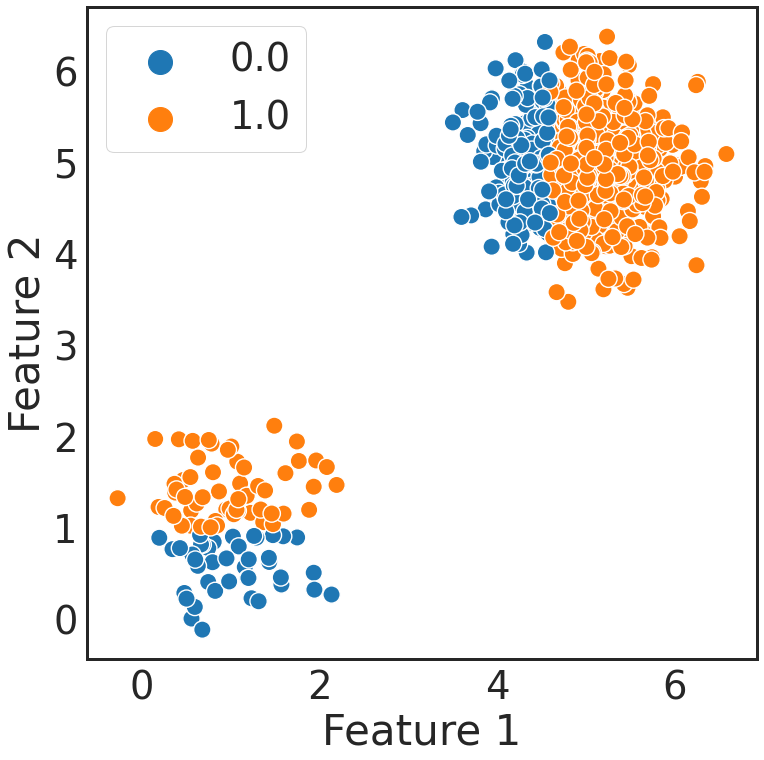

In [4]:
np.random.seed(0)

def two_groups_dataset(N, N_1, c2_x, c2_y, c2_xb):
    X = np.zeros((N, 2))
    Y = np.zeros((N,))
    X[:N_1, :] = np.random.multivariate_normal([1, 1], [[.25, 0], [0, .25]], size=N_1)
    X[N_1:, :] = np.random.multivariate_normal([c2_x, c2_y], [[0.25, 0], [0, .25]], size=N-N_1)
    Y[:N_1] = X[:N_1, 1] > 1
    Y[N_1:] = X[N_1:, 0] > c2_xb
    return X, Y

N_1 = 100
X, Y = two_groups_dataset(1000, N_1, 5, 5, 4.6)
plt.figure(figsize=(12, 12))
sns.scatterplot(X[:, 0], X[:, 1], hue=Y, s=300)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(markerscale=4)
plt.savefig(f'figures/shap_two_groups/two_groups_data.pdf', bbox_inches='tight', facecolor='white')

## The classifier

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


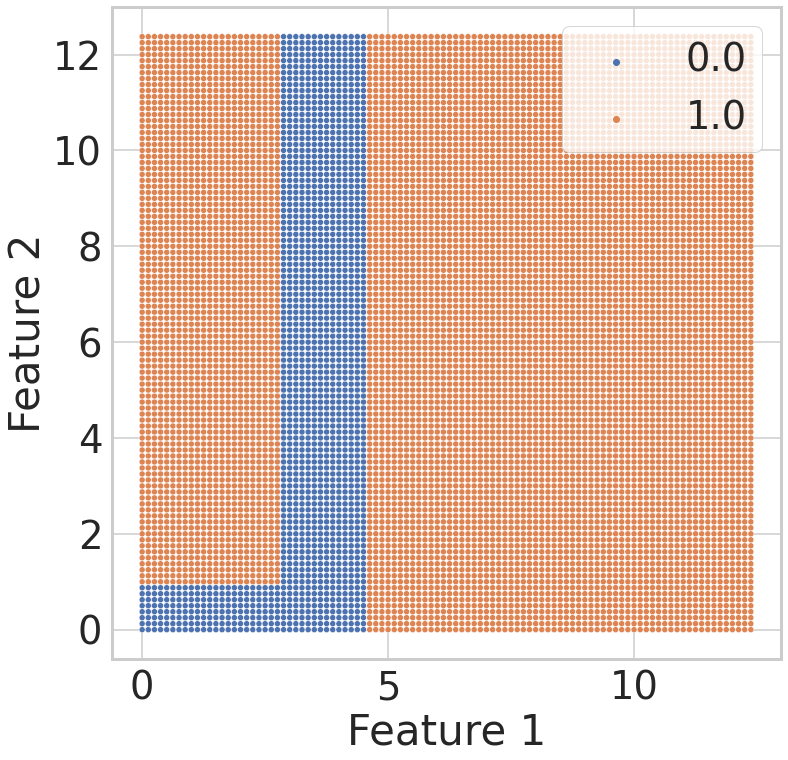

In [15]:
X_grid = np.zeros((10000, 2))
Y_grid = np.zeros((10000,))
for i in range(100):
    for j in range(100):
        idx = 100*i+j
        X_grid[idx] = [i/8, j/8]
        Y_grid[idx] = clf.predict(X_grid[idx, :].reshape(1, 2)) 
plt.figure(figsize=(12, 12))
sns.scatterplot(X_grid[:, 0], X_grid[:, 1], hue=Y_grid)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.savefig(f'figures/shap_two_groups/two_groups_classifier.png', bbox_inches='tight', facecolor='white')
plt.show()

## Reference data set: Group 1 only

In [7]:
sns.set(font_scale = 2.2)
sns.set_style("whitegrid")

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


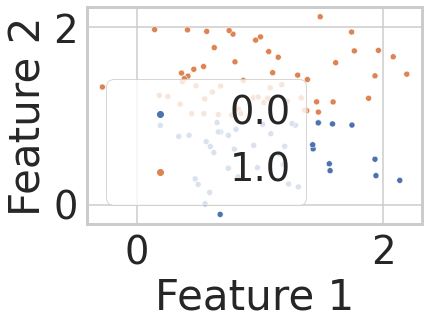

In [14]:
sns.scatterplot(X[:N_1, 0], X[:N_1, 1], hue=Y[:N_1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

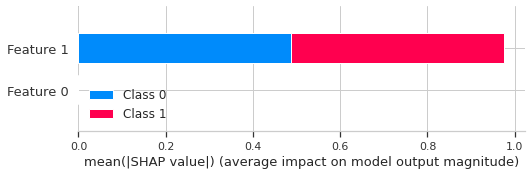

In [9]:
explainer = shap.TreeExplainer(clf, data=X[:N_1, :])

# visualize the first prediction's explanation
shap_values = explainer.shap_values(X[:N_1, :])

shap.summary_plot(shap_values, X[:N_1, :])

In [10]:
sns.set_context("notebook", rc={'axes.linewidth': 3, 'grid.linewidth': 1.5},  font_scale=3.5)

### Explanations: only feature 2 matters

[array([ 0.  , -0.42]), array([0.  , 0.42])] 1.0


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


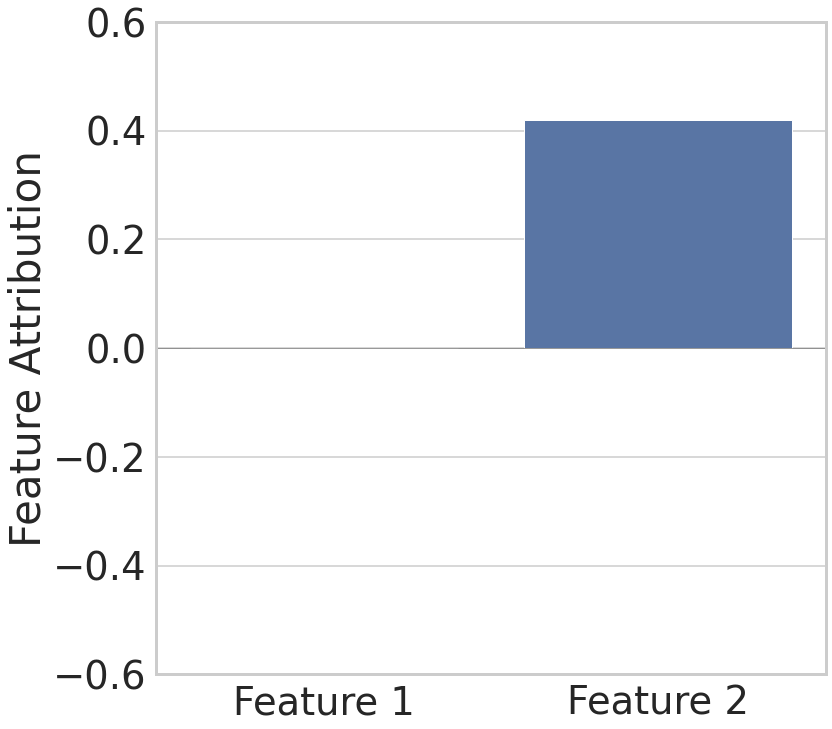

[array([ 0.  , -0.42]), array([0.  , 0.42])] 1.0


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


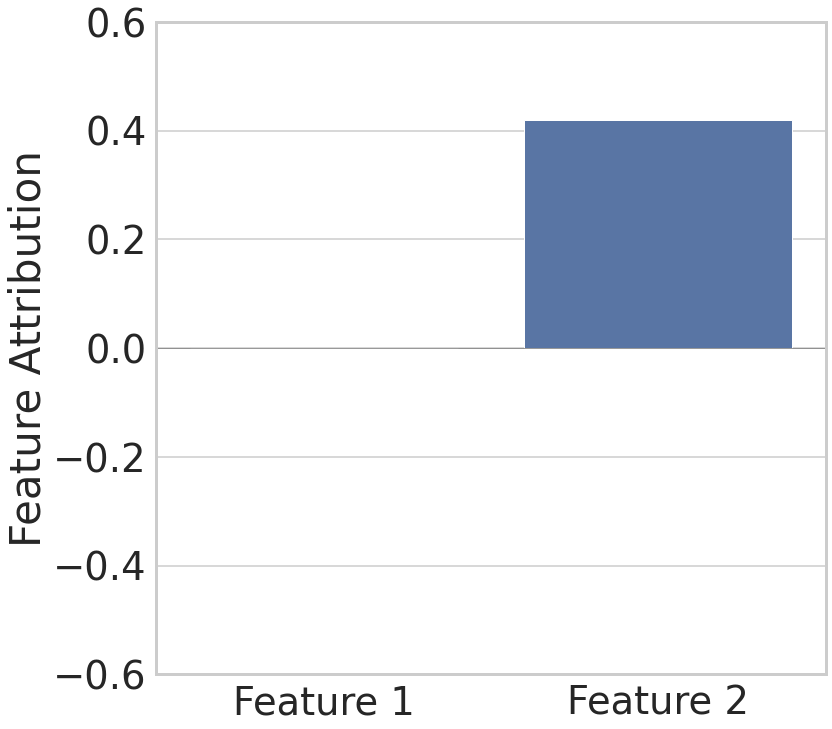

[array([0.  , 0.58]), array([ 0.  , -0.58])] 0.0


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


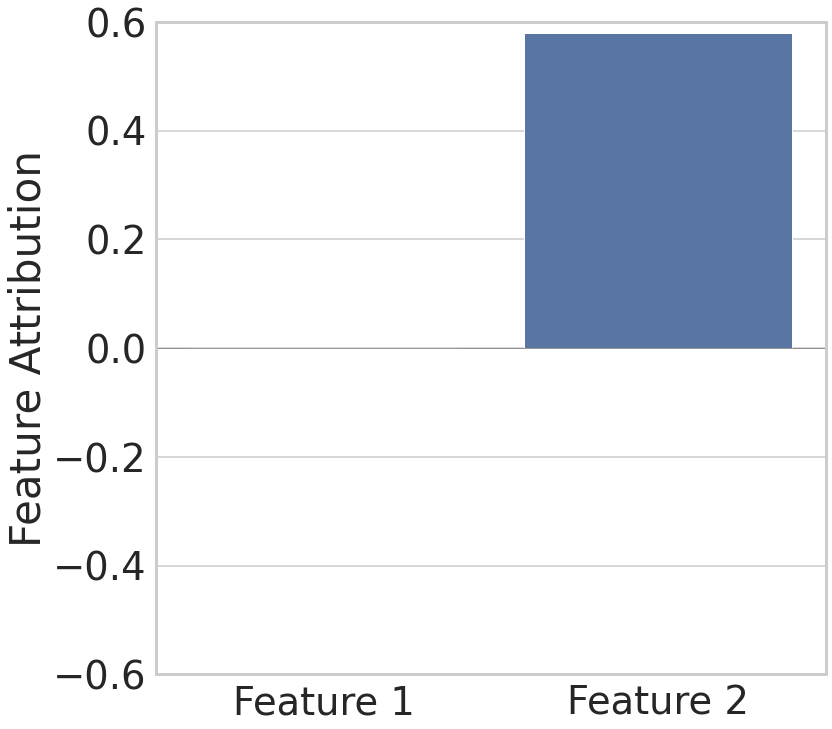

[array([0.  , 0.58]), array([ 0.  , -0.58])] 0.0


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


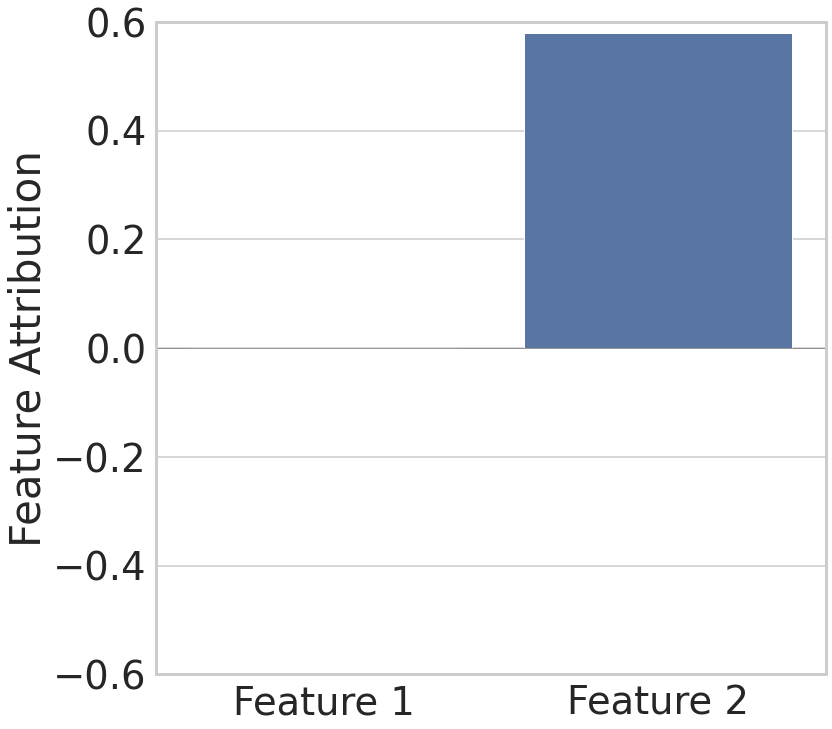

[array([ 0.  , -0.42]), array([0.  , 0.42])] 1.0


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


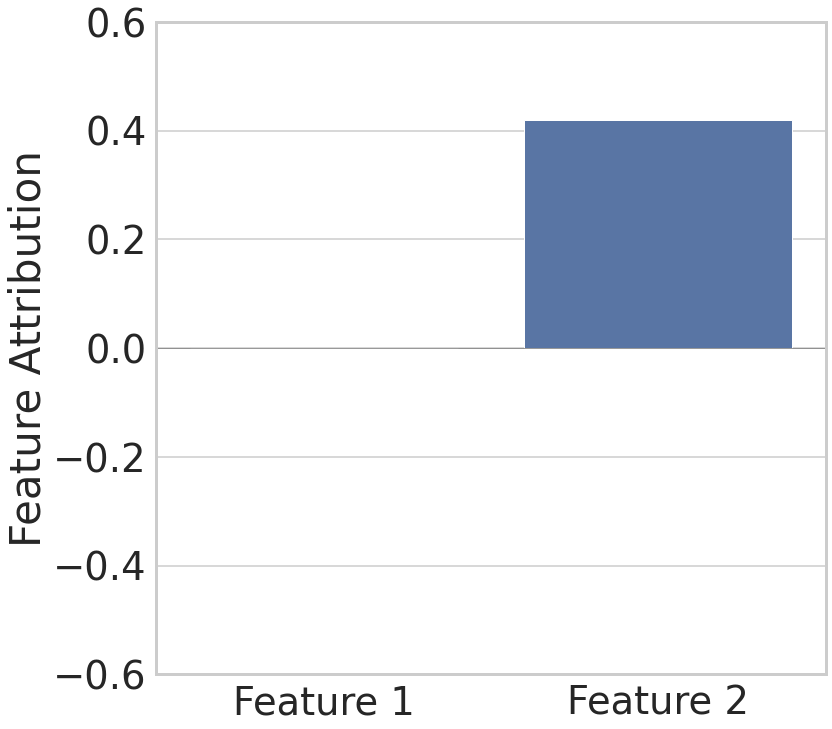

In [11]:
explainer = shap.TreeExplainer(clf, data=X[:N_1, :])    
for i in range(5):
    shap_values = explainer.shap_values(X[i, :])
    print(shap_values, clf.predict(X[i, :].reshape(1, 2))[0])
    
    top_class = int(clf.predict(X[i, :].reshape(1, 2))[0])
    futil.viz_feature_attributions(shap_values[top_class], ['Feature 1', 'Feature 2'], None, ylim=(-0.6, 0.6), rotation=0)
    plt.savefig(f'figures/shap_two_groups/{i}_first_group.pdf', bbox_inches='tight', facecolor='white')
    plt.show()

## Reference data set: entire dataset

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


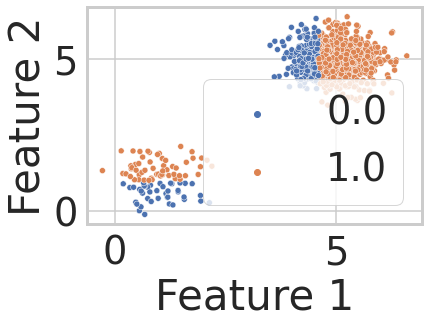

In [17]:
sns.scatterplot(X[:, 0], X[:, 1], hue=Y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

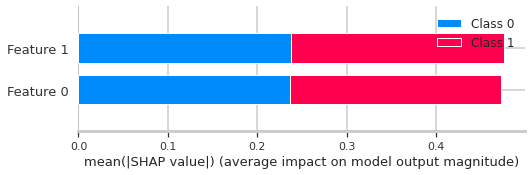

In [18]:
explainer = shap.TreeExplainer(clf, data=X)

# visualize the first prediction's explanation
shap_values = explainer.shap_values(X[:N_1, :])

shap.summary_plot(shap_values, X[:N_1, :])

### Explanations: For observations with prediction 1, only feature 1 matters

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[array([-0.31, -0.03]), array([0.31, 0.03])] 1


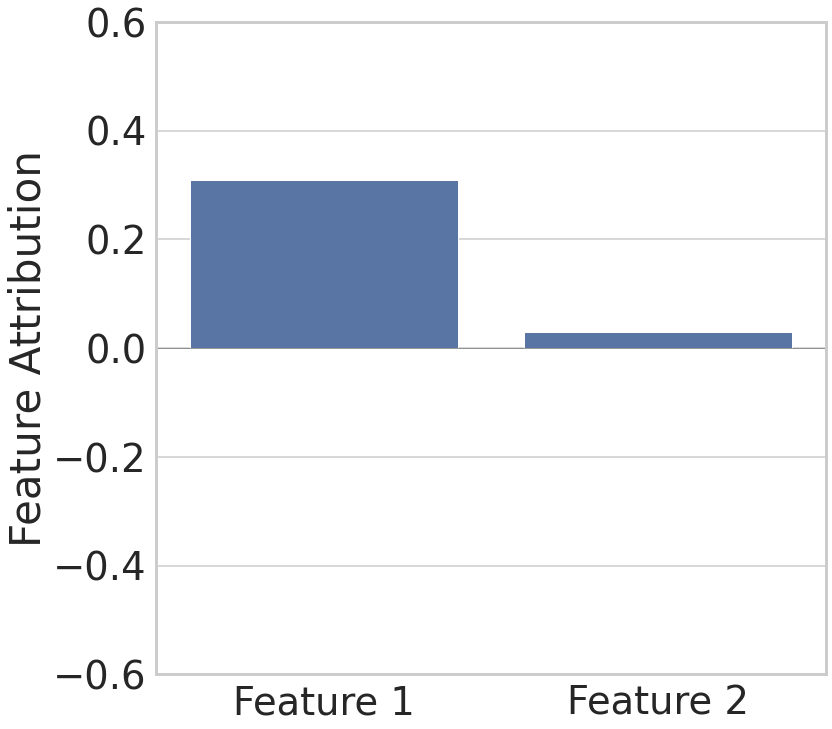

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[array([-0.31, -0.03]), array([0.31, 0.03])] 1


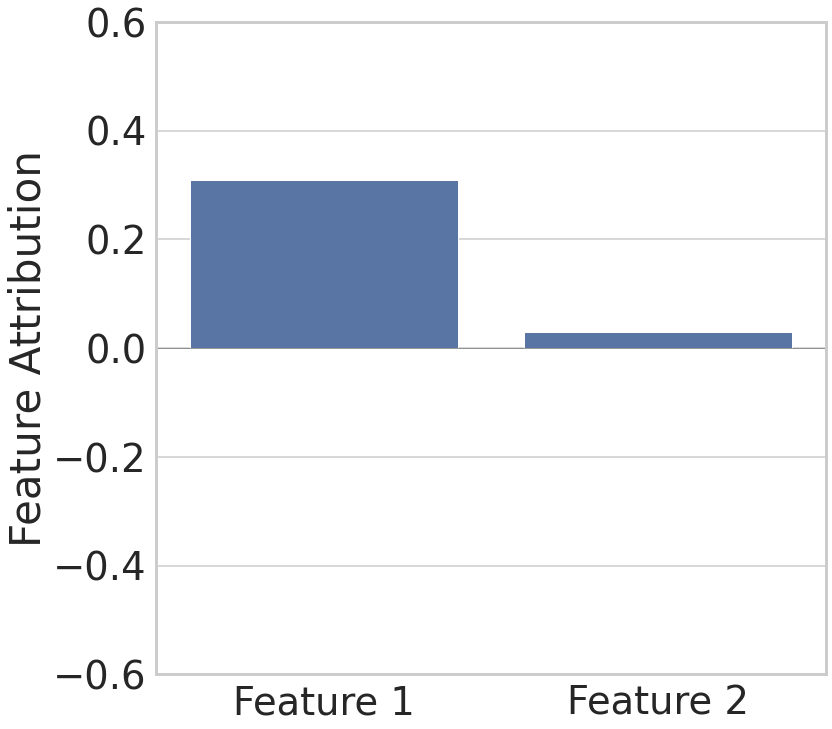

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[array([0.135, 0.525]), array([-0.135, -0.525])] 0


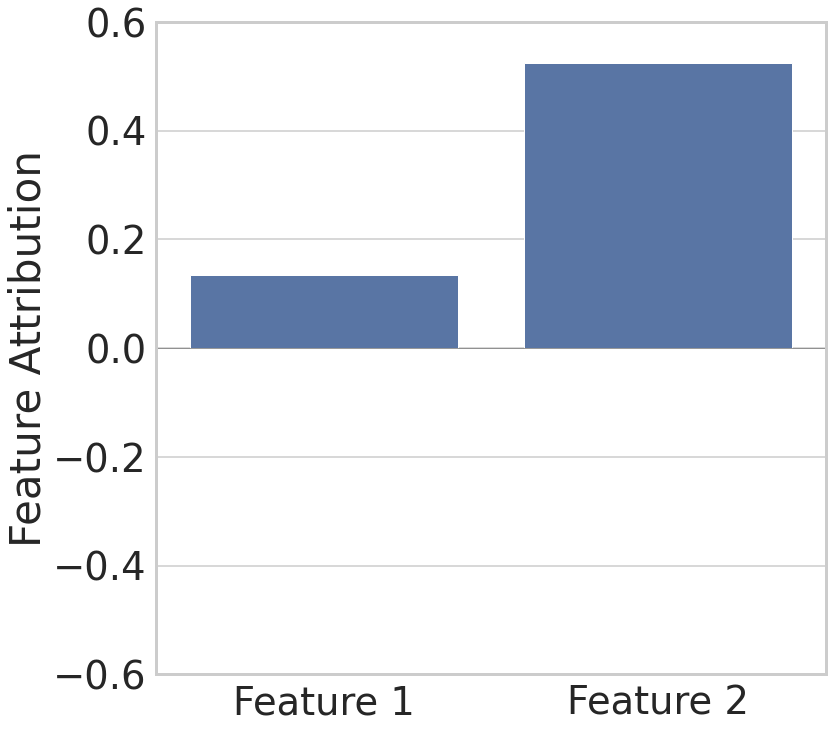

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[array([0.135, 0.525]), array([-0.135, -0.525])] 0


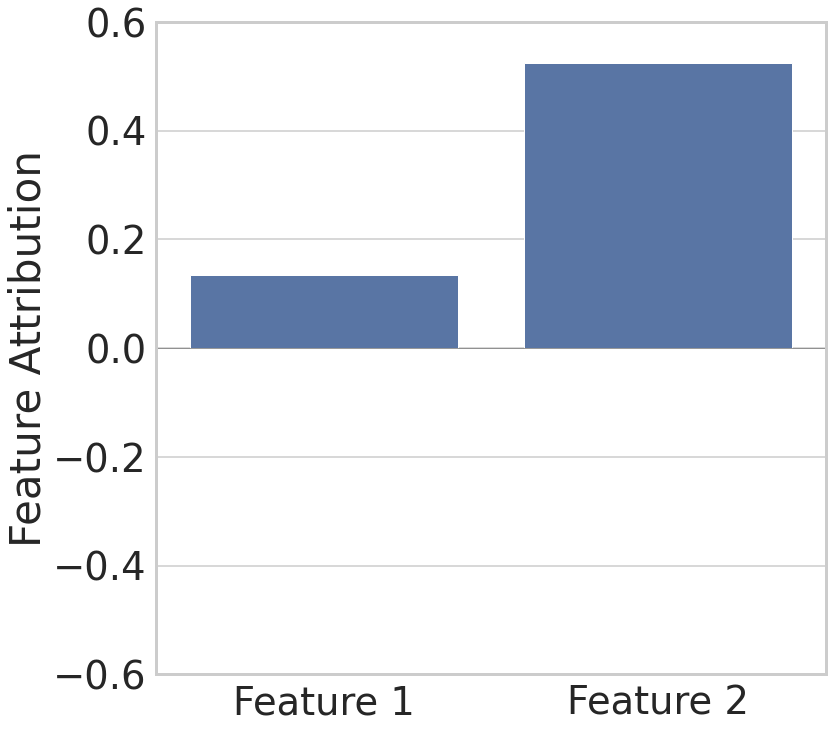

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[array([-0.31, -0.03]), array([0.31, 0.03])] 1


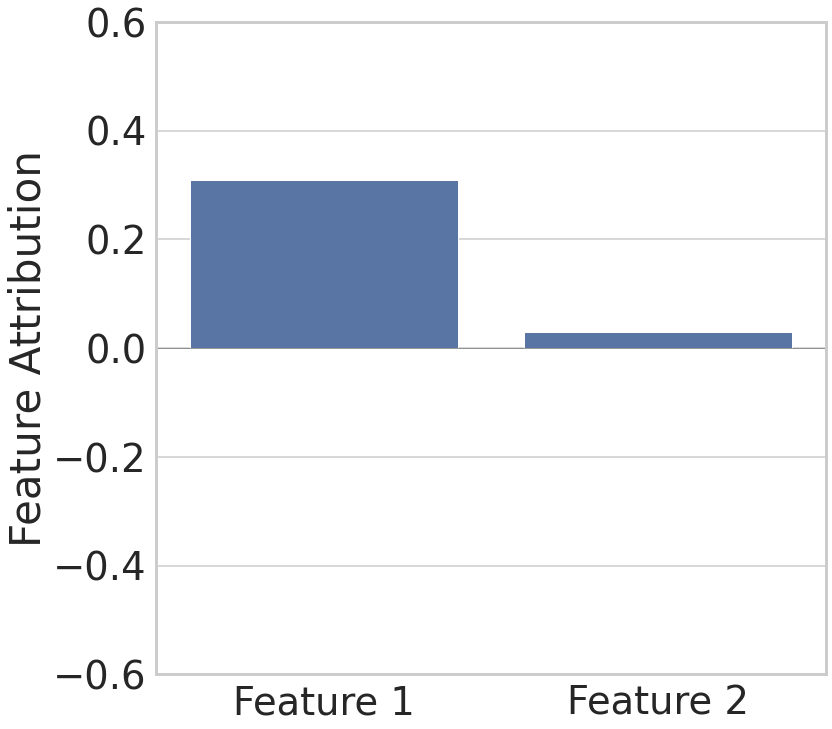

In [19]:
explainer = shap.TreeExplainer(clf, data=X)    
for i in range(5):
    shap_values = explainer.shap_values(X[i, :])
    
    top_class = int(clf.predict(X[i, :].reshape(1, 2))[0])
    futil.viz_feature_attributions(shap_values[top_class], ['Feature 1', 'Feature 2'], None, ylim=(-0.6, 0.6), rotation=0)
    print(shap_values, top_class)
    plt.savefig(f'figures/shap_two_groups/{i}_both_groups.pdf', bbox_inches='tight', facecolor='white')
    plt.show()